In [1]:
#####################################################
# Comparison of AB Testing and Existing and New Product Listing Pages
#####################################################

#####################################################
# Problem
#####################################################

# An e-commerce site has conducted a test study for the new product 
# listing page it has designed, and both control and test data have been shared.



#####################################################
# Dataset
#####################################################

# # control ve test dataset: 37 observation, 4 variable
# Date: Website Entry Date
# Pageviews: # of pageviews
# Clicks: # of clicks
# Payments: Total Payment



#####################################################
# Project Duties
#####################################################

######################################################
# AB Testing (Two Independent Samples T Test)
######################################################

# 1. Create Hyphothesis
# 2. Hyphothesis Control
#   - 1. Normality Distribution Hyphothesis (shapiro)
#   - 2. Variance Homogeneity (levene)
# 3. Application of Hyphothesis
#   - 1. If both hyphothesis are satisfied, two independent samples T-Test is applied
#   - 2. If not satisfied, mannwhitneyu test is applied
# 4. Comment based on p-value 


import itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
# !pip install statsmodels
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest
pd.set_option('display.max_columns', None)


In [2]:

#####################################################
# Task 1:  Preparing and Analyzing Data
#####################################################

############################
# Step 1:  Read control.csv and test.csv files. Allocate both dataset into different variables
############################

control_group = pd.read_csv('/kaggle/input/e-commerce-control-and-test/Control.csv')
test_group = pd.read_csv('/kaggle/input/e-commerce-control-and-test/Test.csv')


control_group["Control-Test"] = "Control"

control_group.groupby("Control-Test").agg({"Payments": "mean"})

test_group["Control-Test"] = "Test"

test_group.groupby("Control-Test").agg({"Payments": "mean"})



,Payments
Control-Test,
Test,88.391304


In [3]:
############################
# Step 2: Analyze control and test group data
############################

control_group.describe().T
test_group.describe().T

control_group.isnull().sum()

test_describe = test_group.describe()
control_describe = control_group.describe()


In [4]:
############################
# Step 3: After the analysis process, combine the control and test group data using the concat method.
# Create a new dataframe named ab_concat and add it to it.
############################

ab_concat = pd.concat([test_group,control_group]).reset_index()
ab_concat.head(80)
ab_concat.isnull().sum()


index            0
Date             0
Pageviews        0
Clicks           0
Payments        28
Control-Test     0
dtype: int64

In [5]:

############################
# Step 4: Check for null values. Delete any blank lines.
############################
ab_concat.dropna(inplace=True)
ab_concat.isnull().sum()
ab_concat.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 59
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         46 non-null     int64  
 1   Date          46 non-null     object 
 2   Pageviews     46 non-null     int64  
 3   Clicks        46 non-null     int64  
 4   Payments      46 non-null     float64
 5   Control-Test  46 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 2.5+ KB


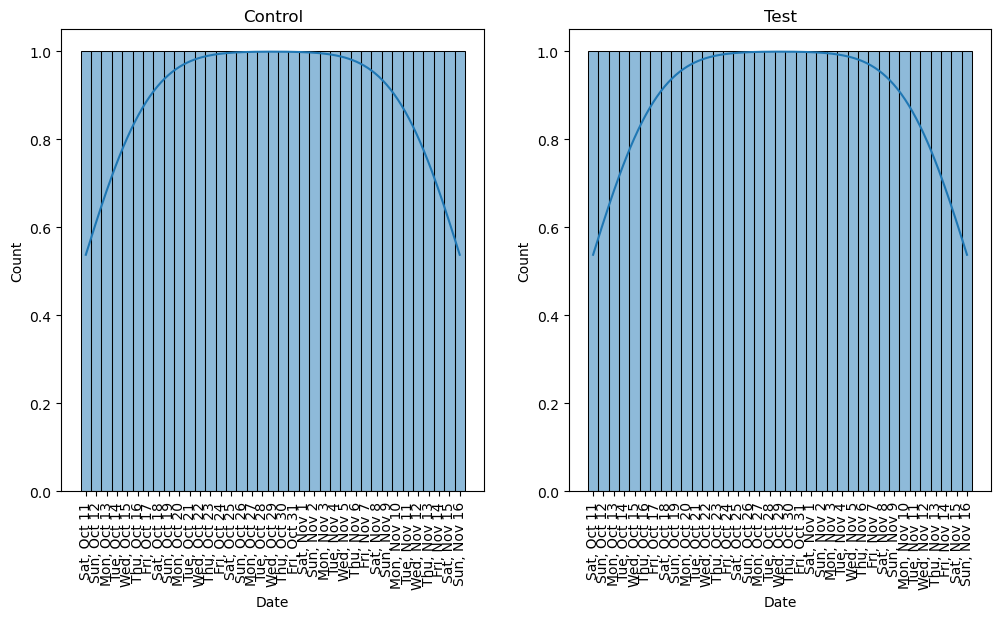

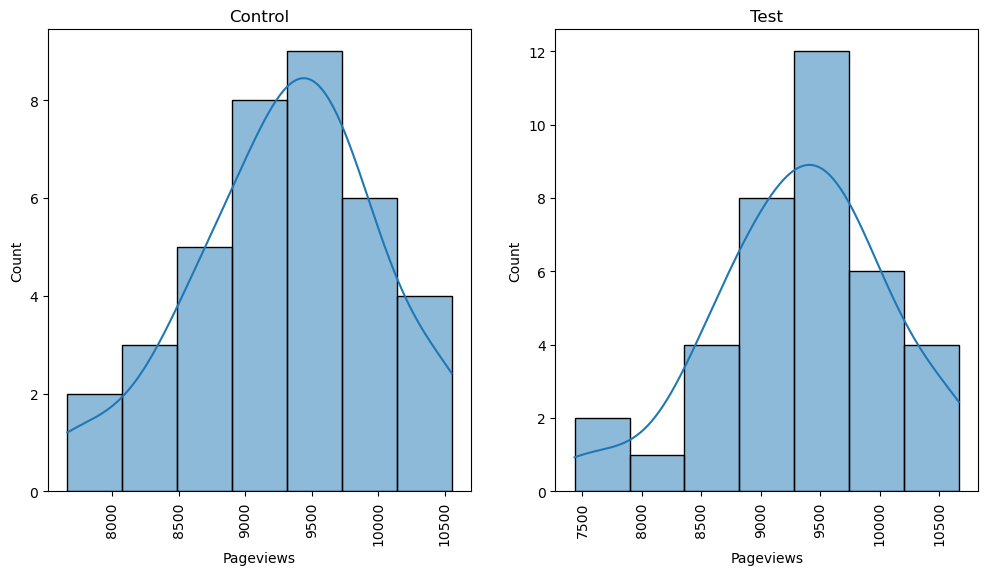

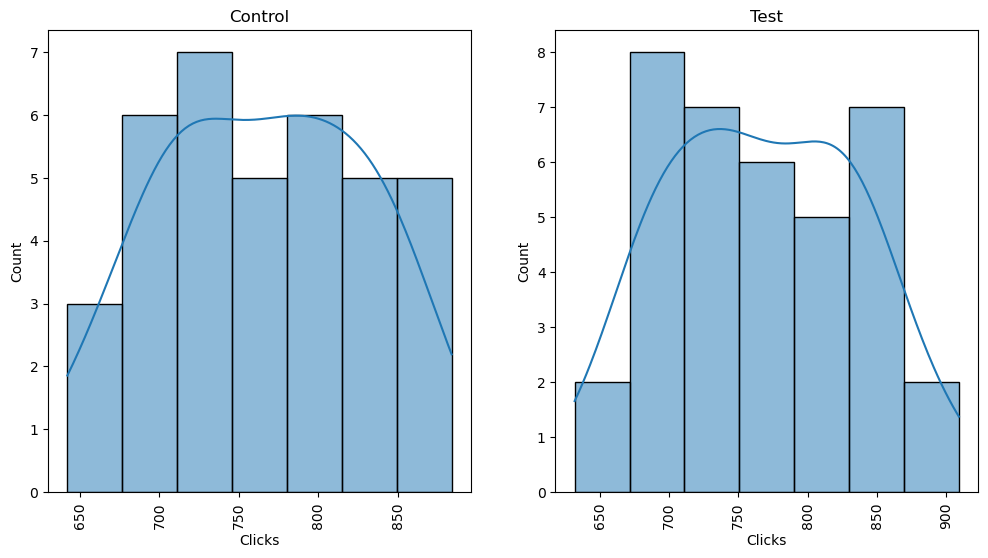

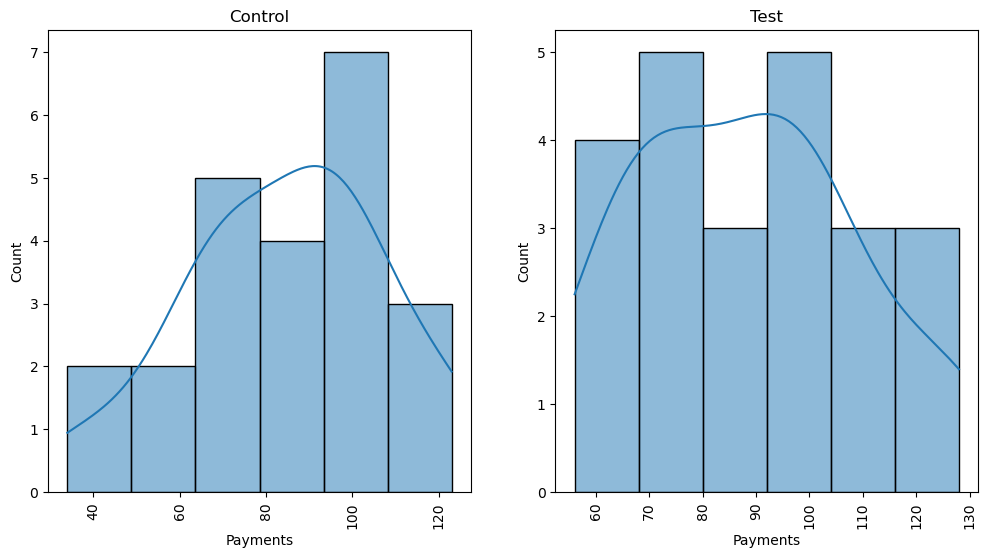

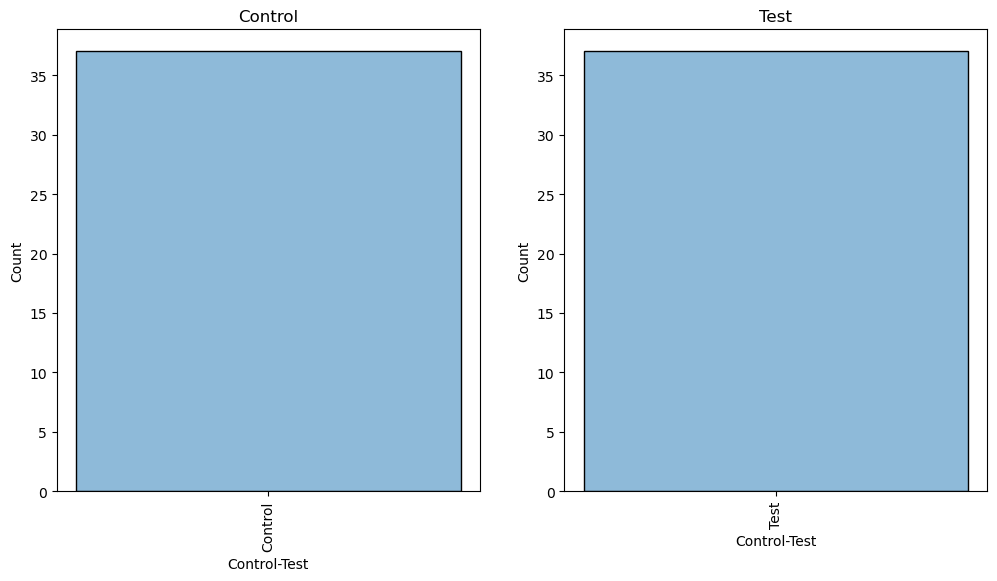

In [6]:

############################
# Step 5: Divide the number of "Clicks" by the number of "Pageviews". Multiply the result by the "Payments" value.
############################
# Step 6: Assign the results to a new variable named "total_value" and add this variable to ab_concat
############################

ab_concat["total_value"]= (ab_concat["Clicks"] / ab_concat["Pageviews"])*ab_concat["Payments"]

ab_concat.sort_values(by="total_value", ascending=False)

# Graphics
for col in test_group.columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data=control_group, x=col, kde=True)
    plt.title('Control')
    plt.xlabel(col)
    plt.xticks(rotation = 90)
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.histplot(data=test_group, x=col, kde=True)
    plt.title('Test')
    plt.xlabel(col)
    plt.xticks(rotation = 90)
    plt.ylabel('Count')


In [7]:
#####################################################
# Task 2: Defining the Hypothesis of A/B Testing
#####################################################

############################
# Step 1: Define the hypothesis.
############################

"""
 H0: M1 = M2 => There is no statistically significant difference between the mean total value of the Control and Test groups.
 H1: M1!= M2 # ..... there is
"""

'\n H0: M1 = M2 => There is no statistically significant difference between the mean total value of the Control and Test groups.\n H1: M1!= M2 # ..... there is\n'

In [8]:
############################
# Step 2: Analyze the total_value means for the control and test group.
############################

ab_concat.groupby("Control-Test").agg({"total_value": "mean"})

,total_value
Control-Test,
Control,6.875027
Test,7.176687


In [9]:
#####################################################
# TASK 3: Performing Hypothesis Testing
#####################################################

############################
# Step 1: Perform hypothesis checks before hypothesis testing.
############################

# Normality Assumption

# H0: The assumption of normal distribution is provided.
# H1:.. not provided

test_stat, pvalue = shapiro(ab_concat.loc[ab_concat["Control-Test"] == "Control", "total_value"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

## p-value = 0.8816 ----> H0 can not be rejected. Normal distribution is satisfied.

test_stat, pvalue = shapiro(ab_concat.loc[ab_concat["Control-Test"] == "Test", "total_value"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

## p-value = 0.8642 ----> H0 can not be rejected. Normal distribution is satisfied.


# Variance Homogeneity Assumption

# H0: Variance Homogeneity is satisfied
# H1: ... not satisfied

test_stat, pvalue = levene(ab_concat.loc[ab_concat["Control-Test"] == "Control", "total_value"],
                           ab_concat.loc[ab_concat["Control-Test"] == "Test", "total_value"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

## p-value = 0.4838 ----> H0 can not be rejected. Variance homogeneity is satisfied.

Test Stat = 0.9786, p-value = 0.8816
Test Stat = 0.9777, p-value = 0.8642
Test Stat = 0.4986, p-value = 0.4838


In [10]:
############################
# Step 2: Select the appropriate test according to the Normality Assumption and Variance Homogeneity results.
############################

"""
Our tests confirmed both of our hypotheses.
In this case we perform our AB Test with t-test
"""

test_stat, pvalue = ttest_ind(ab_concat.loc[ab_concat["Control-Test"] == "Control", "total_value"],
                           ab_concat.loc[ab_concat["Control-Test"] == "Test", "total_value"],
                            equal_var=True)
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = -0.6057, p-value = 0.5478


In [11]:
############################
# Step 3: Considering the p_value obtained as a result of the test, interpret whether there is a statistically 
# significant difference between the purchasing averages of the control and test groups.
############################
"""
p-value is 0.5478. So we cannot reject the H0 hypothesis. In other words, we cannot say that there is a significant difference between the two methods.
H0: M1 = M2 cannot be rejected.
"""

'\np-value is 0.5478. So we cannot reject the H0 hypothesis. In other words, we cannot say that there is a significant difference between the two methods.\nH0: M1 = M2 cannot be rejected.\n'

In [12]:
######################################################
# Task 4: Analysis of Results
######################################################

# Step 1: Which test did you use, state the reasons.

"""
Since the assumptions of Normality and Homogeneity of Variance were satisfied, we performed an independent two-sample t-test.
"""

# Step 2: Advise the customer according to the test results you have obtained.

"""
According to the result we obtained, there is a significant difference between the control and test groups in terms of total_value averages compared to the available data.
We saw no difference. In the current situation, it can be evaluated that there is no need to use the new product listing page due to its cost.
However, data collection can continue. After a certain period of time, the AB test can be performed again with the collected data.
"""

'\nAccording to the result we obtained, there is a significant difference between the control and test groups in terms of total_value averages compared to the available data.\nWe saw no difference. In the current situation, it can be evaluated that there is no need to use the new product listing page due to its cost.\nHowever, data collection can continue. After a certain period of time, the AB test can be performed again with the collected data.\n'